# Technical exercise - Data scientist intern @ Giskard

Hi! As part of our recruitment process, we’d like you to complete the following technical test in 10 days. Once you finish the exercise, you can send your notebook or share your code repository by email (matteo@giskard.ai). If you want to share a private GitHub repository, make sure you give read access to `mattbit`.

If you have problems running the notebook, get in touch with Matteo at matteo@giskard.ai.

In [4]:
%pip install numpy pandas scikit-learn datasets transformers torch "giskard>=2.0.0b"

Note: you may need to restart the kernel to use updated packages.


## Exercise 1: Code review

Your fellow intern is working on securing our API and wrote some code to generate secure tokens. You have been asked to review their code and make sure it is secure and robust. Can you spot the problem and write a short feedback?

In [53]:
import random

ALPHABET = "abcdefghijklmnopqrstuvxyz0123456789"


def generate_secret_key(size: int = 20):
    """Generates a cryptographically secure random token."""
    token = "".join(random.choice(ALPHABET) for _ in range(size))
    return token


#I know that the Python random function isn't as random as we could believe it
#In python random function documentation it is written: "The module implements pseudo-random number generators"
#The correct way to create such a function would be:
import secrets

def generate_secret_key_v2(size: int = 20):
    """Generates a cryptographically secure random token."""
    token = "".join(secrets.choice(ALPHABET) for _ in range(size))
    return token

## Exercise 2: High dimensions

Matteo, our ML researcher, is struggling with a dataset of 40-dimensional points. He’s sure there are some clusters in there, but he does not know how many. Can you help him find the correct number of clusters in this dataset?

It looks like there are ??? clusters.


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

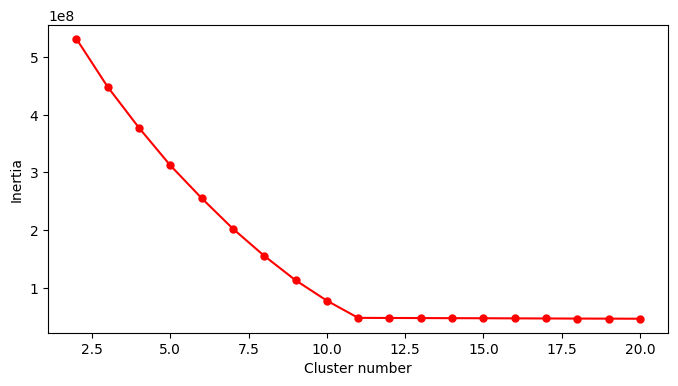

By looking at the plot and using the elbow method we can see that 11 clusters would be enough


In [54]:
import numpy as np

x = np.load("points_1.npy")

print("It looks like there are ??? clusters.")

#-------------------------------------------------------------------------------------------
#                                    My solution
#-------------------------------------------------------------------------------------------
#In order to determine who many clusters are needed, I used the elbow method
#The aim is to display on a graph the number of clusters as a function of inertia
#and identify the "elbow" zone in cost minimisation.
#For this classification problem I used the Kmeans model.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia=[]
K_range=range(2,21)

#each iteration add the Kmean's inertia with a different number of cluster
for k in K_range:
    model=KMeans(n_clusters = k).fit(x)
    inertia.append(model.inertia_)

#We plot the number of clusters as a function of inertia
plt.figure(figsize=((8,4)))
plt.plot(K_range,inertia, marker='o', color='red', markersize=5)
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.show()

print("By looking at the plot and using the elbow method we can see that 11 clusters would be enough")

Matteo is grateful for how you helped him with the cluster finding, and he has another problem for you. He has another high-dimensional dataset, but he thinks that those points could be represented in a lower dimensional space. Can you help him determine how many dimensions would be enough to well represent the data?

It looks the data is ???-dimensional


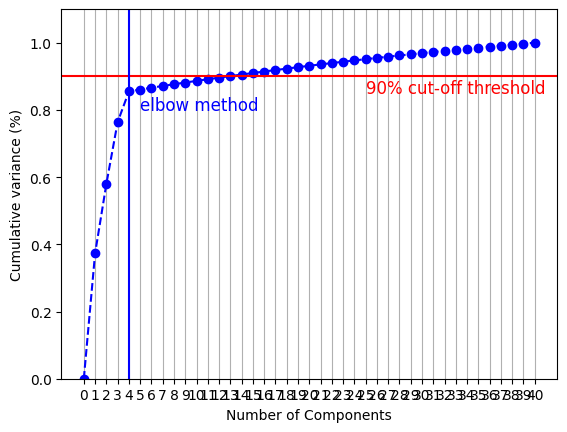

In [2]:
import numpy as np

x = np.load("points_2.npy")


# ...
print("It looks the data is ???-dimensional")

#-------------------------------------------------------------------------------------------
#                                    My solution
#-------------------------------------------------------------------------------------------
#A scree plot may be used to plot the eigenvalues according to their size.
#The aim is to detect the elbow, i.e. the eigenvalue where the slope in this graph goes
#from steep to flat: keep only the components which are before the elbow.
#another method to find out how many components are needed is setting a threshold
#such as that we select the PC which account for a certain percentage of cumulative variance
#For this classification problem I used the Principal component analysis.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(x)

fig, ax = plt.subplots()
xi = np.arange(0, 41, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
y = np.insert(y, 0, 0)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 41, step=1))
plt.ylabel('Cumulative variance (%)')

#plotting red line and text
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=4, color='b', linestyle='-')
#plotting blue line and text
plt.text(25, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.text(5, 0.8, 'elbow method', color = 'blue', fontsize=12)

ax.grid(axis='x')
plt.show()

## Exercise 3: Mad GPT

Matteo is a good guy but he is a bit messy: he fine-tuned a GPT-2 model, but it seems that something went wrong during the process and the model became obsessed with early Romantic literature.

Could you check how the model would continue a sentence starting with “Ty”? Could you recover the logit of the next best token? And its probability?

You can get the model from the HuggingFace Hub as `mattbit/gpt2wb`.


In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("mattbit/gpt2wb")

# ..

#-------------------------------------------------------------------------------------------
#                                    My solution
#-------------------------------------------------------------------------------------------
# For this problem I find the solution looking on internet :https://discuss.huggingface.co/t/announcement-generation-get-probabilities-for-generated-output/30075
# I used the function compute_transition_scores to get logit and probabilities of the token

inputs = tokenizer(["Ty"], return_tensors='pt')

outputs = model.generate(
    **inputs,
    max_new_tokens=30,
    num_beams=4,# We can play on this parameter to go from greedy search to beam search
    output_scores=True,
    return_dict_in_generate=True,
)

print("This is how the model would continue a sentence starting with “Ty”: \n",
      tokenizer.decode(outputs.sequences[0]))

transition_scores = model.compute_transition_scores(
    outputs.sequences, outputs.scores, normalize_logits=True
)

print("\nnext token: ",
      tokenizer.decode(outputs.sequences[0][1]),# We have to go to index 1, because the 0 is associated with the input token "Ty" in this case.
      '\nlogit: ',
      transition_scores[0][0].numpy(),
      "\nprobability: ",
      np.exp(transition_scores[0][0].numpy()))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This is how the model would continue a sentence starting with “Ty”: 
 Tyger Tyger, burning bright, 
In the forests of the night; 
What immortal hand or eye, 
Could frame thy fearful

next token:  ger 
logit:  -0.0038598098 
probability:  0.9961476


## Exercise 4: Not bad reviews


We trained a random forest model to predict if a film review is positive or negative. Here is the training code:

In [29]:
import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


# Load training data
train_data = datasets.load_dataset("sst2", split="train[:20000]").to_pandas()
valid_data = datasets.load_dataset("sst2", split="validation").to_pandas()

# Prepare model
with open("stopwords.txt", "r") as f:
    stopwords = [w.strip() for w in f.readlines()]

preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=False)

classifier = RandomForestClassifier(n_estimators=400, n_jobs=-1, max_features=12)

model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])

# Training
X = train_data.sentence
y = train_data.label

model.fit(X, y)
print(
    "Training complete.",
    "Accuracy:",
    model.score(valid_data.sentence, valid_data.label),
)

Training complete. Accuracy: 0.7672018348623854


In [42]:
#-------------------------------------------------------------------------------------------
#                                    My solution
#-------------------------------------------------------------------------------------------
# I was a bit lost at the beginning, so I went to read RandomForestClassifier documentation and some website article
# to have a better understanding of how I could improve accuracy. I read that by changing hyperparameters values I
# could improve accuracy. So I created the next functions with the aim of finding the best hyperparameters values.
# I tried to train the model whilst testing different hyperparameter values in order to increase accuracy.
array_estimator = [200, 400, 600, 800, 900]
array_features = [4, 8, 12, 16, 32]
array_depth = [400, 500, 600, 800, 900]
X = train_data.sentence
y = train_data.label

# A function which take three parameters which are hyperparameters of random forest model,
# This function train the model and return the accuracy.
def train_model(estimator, feature, depth):
    preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=False)
    classifier = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, max_features=feature, max_depth=depth)
    model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])
    model.fit(X, y)
    return model.score(valid_data.sentence, valid_data.label)

# A function which test different hyperparameter when training the model,
# This function returns the different accuracy.
def test_models():
    accuracy_estimator = []
    for estimator in array_estimator:
        accuracy_estimator.append(train_model(estimator, 12, None))
    accuracy_feature = []
    for feature in array_features:
        accuracy_feature.append(train_model(400, feature, None))
    accuracy_depth = []
    for depth in array_depth:
        accuracy_depth.append(train_model(400, 12, depth))

    return [accuracy_estimator, accuracy_feature, accuracy_depth]

In [47]:
# A function which average the accuracy of
def average_accuracy(Pipeline: model) -> float:
    accuracy_list = []
    for i in range(5):
        model.fit(X, y)
        accuracy_list.append(model.score(valid_data.sentence, valid_data.label))
    return sum(accuracy_list)/len(accuracy_list)

In [43]:
model_results = test_models()
print(model_results) # We find out that we have the best accuracy with the hyperparameter max_features = 4

[[0.7591743119266054, 0.7580275229357798, 0.7591743119266054, 0.7465596330275229, 0.7568807339449541], [0.7706422018348624, 0.7614678899082569, 0.7649082568807339, 0.7694954128440367, 0.7614678899082569], [0.7408256880733946, 0.7431192660550459, 0.7545871559633027, 0.7477064220183486, 0.7477064220183486]]


In [48]:
preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=False)
classifier = RandomForestClassifier(n_estimators=400, n_jobs=-1, max_features=4)
model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])
print(average_accuracy(model)) # calculating the average accuracy of the model with max_features=4

0.7720183486238532


In [51]:
#I tried to take a look at the vocabulary and the importance associated to each word to understand what could cause
# the mistakes.

import pandas as pd

test = pd.DataFrame(list(model['preprocessor'].vocabulary_))

features_importance = pd.DataFrame(list(zip(model['classifier'].feature_importances_, model['preprocessor'].vocabulary_)))
features_importance.columns = ["importance", "feature"]
features_importance = features_importance.sort_values(by=['importance'], ascending=False)

print(features_importance)# I could hardly get conclusion based on those results

      importance      feature
322     0.006540     sloppily
2991    0.005658       besson
1914    0.005270     inspired
2975    0.004601      buoyant
1710    0.004539       simone
...          ...          ...
813     0.000008    motivated
3070    0.000007    sickening
2263    0.000007  forgettable
292     0.000004        highs
2388    0.000004     attempts

[5000 rows x 2 columns]


In [10]:
# Determine the frequency of a word among the dataset.
def frequency(word, data):
    frequency = 0
    for sentence in train_data['sentence']:
        frequency += sentence.count(word)
    return frequency

In [38]:
# Later I learned about grid search which is a better version of what I was trying to do earlier.
# So I tried using grid search in order to find the best values for random forest hyperparameters.

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 2, 8, 12]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
        'classifier__n_estimators': n_estimators,
        'classifier__max_features': max_features,
        'classifier__max_depth': max_depth,
        'classifier__min_samples_split': min_samples_split,
        'classifier__min_samples_leaf': min_samples_leaf,
        'classifier__bootstrap': bootstrap
}

In [56]:
# The GridSerachCV took too much time to finish so I wasn't able to get the results.
preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=False)
classifier = RandomForestClassifier()
model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])

rf_grid_search = GridSearchCV(
        estimator=model,
        param_grid=random_grid,
        return_train_score=True,
        n_jobs=-1)

rf_grid_result = rf_grid_search.fit(X, y)

print(rf_grid_result)

KeyboardInterrupt: 

In [ ]:
# Same problem than GridSearchCV
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random_result = rf_random.fit(X, y)

Overall, it works quite well, but we noticed it has some problems with reviews containing negations, for example:

In [25]:
# Class labels are:
# 1 = Positive, 0 = Negative

# this returns positive, that’s right!
assert model.predict(["This movie is good"]) == [1]

# negative! bingo!
assert model.predict(["This movie is bad"]) == [0]

# WHOOPS! this ↓ is predicted as negative?! uhm…
#assert model.predict(["This movie is not bad at all!"]) == [1]# Sometimes is considered as positive or negative due to the randomness of the model
print(model.predict(["This movie is not bad at all!"]))

# WHOOPS! this ↓ is predicted as negative?! why?
#assert model.predict(["This movie is not perfect, but very good!"]) == [1]
print(model.predict(["This movie is not perfect, but very good!"]))


#Sometimes the model training managed to get some of the last two predictions correct, but it was probably pure chance.
# In the end I couldn't get the two last predictions correct even though I improve the accuracy of the model.

[1]
[0]


Implementation of bag of words and random forest

Can you help us understand what is going on? Do you have any idea on how to fix it?
You can edit the code above.

## Exercise 5: Model weaknesses


The Giskard python library provides an automatic scanner to find weaknesses and vulnerabilities in ML models.

Using this tool, could you identify some issues in the movie classification model above? Can you propose hypotheses about what is causing these issues?

Then, choose one of the issues you just found and try to improve the model to mitigate or resolve it — just one, no need to spend the whole weekend over it!

You can find a quickstart here: https://docs.giskard.ai/en/latest/getting-started/quickstart.html

In [35]:
import giskard
from giskard import demo, Model
import pandas as pd
import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Load training data
train_data = datasets.load_dataset("sst2", split="train[:20000]").to_pandas()
valid_data = datasets.load_dataset("sst2", split="validation").to_pandas()

#constant definition
TARGET_NAME = 'label'

# Prepare model
with open("stopwords.txt", "r") as f:
    stopwords = [w.strip() for w in f.readlines()]

preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=True)

classifier = RandomForestClassifier(n_estimators=400, n_jobs=-1, max_features=2)

model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])

# Training
X = train_data.sentence
y = train_data.label

model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 TfidfVectorizer(max_features=5000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             'your', 'yours', 'yourself',
                                             'yourselves', 'he', 'him', 'his',
                                             'himself', 'she', 'her', 'hers',
                                             'herself', 'it', 'its', 'itself',
                                             'they', 'them', 'their', 'theirs',
                                             'themselves', 'what', ...])),
                ('classifier',
                 RandomForestClassifier(max_features=2, n_estimators=400,
                                        n_jobs=-1))])

In [36]:
#-------------------------------------------------------------------------------------------
#                                    My solution
#-------------------------------------------------------------------------------------------
raw_dataset = pd.concat([X, y], axis=1)
giskard_dataset = giskard.Dataset(
    df=train_data,
    target=TARGET_NAME,
    name='review_classification_dataset',
)

In [37]:
# A prediction function that takes a pandas.DataFrame as input and returns an array
def prediction_function(df: pd.DataFrame) -> np.ndarray:
    return model.predict_proba(df.sentence)

wrapped_model = Model(
    model=prediction_function,
    model_type='classification',
    name='review_classifier',
    classification_labels=model.classes_,
    feature_names=['sentence']
)

In [8]:
result = giskard.scan(model=wrapped_model, dataset=giskard_dataset)

Your model is successfully validated.
🔎 Running scan…
2023-09-10 09:52:12,654 pid:16896 MainThread giskard.scanner.logger INFO     Running detectors: ['PerformanceBiasDetector', 'TextPerturbationDetector', 'EthicalBiasDetector', 'DataLeakageDetector', 'StochasticityDetector', 'OverconfidenceDetector', 'UnderconfidenceDetector', 'SpuriousCorrelationDetector']
Running detector PerformanceBiasDetector…2023-09-10 09:52:12,654 pid:16896 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Running
2023-09-10 09:52:12,654 pid:16896 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Calculating loss
2023-09-10 09:53:36,836 pid:16896 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Loss calculated (took 0:01:24.181466)
2023-09-10 09:53:36,844 pid:16896 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Finding data slices
2023-09-10 10:08:30,910 pid:16896 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: 31 sl

In [9]:
display(result)# third scanner I tried to double the data to solve performance bias problems, but I got new ones.

<iframe id="scan-2650034827280" srcdoc="<!doctype html>
<html lang="en">

<head>
 <title>Giskard Scan Results</title>
 <base target="_blank">
 <meta charset="utf-8">
 
<style>pre code.hljs{display:block;overflow-x:auto;padding:1em}code.hljs{padding:3px 5px}
/*!
 Theme: GitHub Dark
 Description: Dark theme as seen on github.com
 Author: github.com
 Maintainer: @Hirse
 Updated: 2021-05-15

 Outdated base version: https://github.com/primer/github-syntax-dark
 Current colors taken from GitHub's CSS
*/.hljs{background:#0d1117;color:#c9d1d9}.hljs-doctag,.hljs-keyword,.hljs-meta .hljs-keyword,.hljs-template-tag,.hljs-template-variable,.hljs-type,.hljs-variable.language_{color:#ff7b72}.hljs-title,.hljs-title.class_,.hljs-title.class_.inherited__,.hljs-title.function_{color:#d2a8ff}.hljs-attr,.hljs-attribute,.hljs-literal,.hljs-meta,.hljs-number,.hljs-operator,.hljs-selector-attr,.hljs-selector-class,.hljs-selector-id,.hljs-variable{color:#79c0ff}.hljs-meta .hljs-string,.hljs-regexp,.hljs-string{color:#a5d6ff}.hljs-built_in,.hljs-symbol{color:#ffa657}.hljs-code,.hljs-comment,.hljs-formula{color:#8b949e}.hljs-name,.hljs-quote,.hljs-selector-pseudo,.hljs-selector-tag{color:#7ee787}.hljs-subst{color:#c9d1d9}.hljs-section{color:#1f6feb;font-weight:700}.hljs-bullet{color:#f2cc60}.hljs-emphasis{color:#c9d1d9;font-style:italic}.hljs-strong{color:#c9d1d9;font-weight:700}.hljs-addition{background-color:#033a16;color:#aff5b4}.hljs-deletion{background-color:#67060c;color:#ffdcd7}.hljs-copy-wrapper{overflow:hidden;position:relative}.hljs-copy-button:focus,.hljs-copy-wrapper:hover .hljs-copy-button{transform:translateX(0)}.hljs-copy-button{background-color:#2d2b57;background-color:var(--hljs-theme-background);background-image:url('data:image/svg+xml;charset=utf-8,<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="none" viewBox="0 0 24 24"><path fill="%23fff" fill-rule="evenodd" d="M6 5a1 1 0 0 0-1 1v14a1 1 0 0 0 1 1h12a1 1 0 0 0 1-1V6a1 1 0 0 0-1-1h-2a1 1 0 1 1 0-2h2a3 3 0 0 1 3 3v14a3 3 0 0 1-3 3H6a3 3 0 0 1-3-3V6a3 3 0 0 1 3-3h2a1 1 0 0 1 0 2H6Z" clip-rule="evenodd"/><path fill="%23fff" fill-rule="evenodd" d="M7 3a2 2 0 0 1 2-2h6a2 2 0 0 1 2 2v2a2 2 0 0 1-2 2H9a2 2 0 0 1-2-2V3Zm8 0H9v2h6V3Z" clip-rule="evenodd"/></svg>');background-position:50%;background-repeat:no-repeat;border:1px solid #ffffff22;border-radius:.25rem;color:#fff;height:2rem;position:absolute;right:1em;text-indent:-9999px;top:1em;transition:background-color .2s ease,transform .2s ease-out;width:2rem}.hljs-copy-button:hover{border-color:#ffffff44}.hljs-copy-button:active{border-color:#ffffff66}.hljs-copy-button[data-copied=true]{background-image:none;text-indent:0;width:auto}@media (prefers-reduced-motion){.hljs-copy-button{transition:none}}.hljs-copy-alert{clip:rect(0 0 0 0);-webkit-clip-path:inset(50%);clip-path:inset(50%);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px}
/*! tailwindcss v3.3.2 | MIT License | https://tailwindcss.com*/*,:after,:before{border:0 solid #e5e7eb;box-sizing:border-box}:after,:before{--tw-content:""}html{-webkit-text-size-adjust:100%;font-feature-settings:normal;font-family:ui-sans-serif,system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;font-variation-settings:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4}body{line-height:inherit;margin:0}hr{border-top-width:1px;color:inherit;height:0}abbr:where([title]){-webkit-text-decoration:underline dotted;text-decoration:underline dotted}h1,h2,h3,h4,h5,h6{font-size:inherit;font-weight:inherit}a{color:inherit;text-decoration:inherit}b,strong{font-weight:bolder}code,kbd,pre,samp{font-family:ui-monospace,SFMono-Regular,Menlo,Monaco,Consolas,Liberation Mono,Courier New,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}table{border-collapse:

In [6]:
display(result)# second scanner with lowerCase=True

<iframe id="scan-2554619017872" srcdoc="<!doctype html>
<html lang="en">

<head>
 <title>Giskard Scan Results</title>
 <base target="_blank">
 <meta charset="utf-8">
 
<style>pre code.hljs{display:block;overflow-x:auto;padding:1em}code.hljs{padding:3px 5px}
/*!
 Theme: GitHub Dark
 Description: Dark theme as seen on github.com
 Author: github.com
 Maintainer: @Hirse
 Updated: 2021-05-15

 Outdated base version: https://github.com/primer/github-syntax-dark
 Current colors taken from GitHub's CSS
*/.hljs{background:#0d1117;color:#c9d1d9}.hljs-doctag,.hljs-keyword,.hljs-meta .hljs-keyword,.hljs-template-tag,.hljs-template-variable,.hljs-type,.hljs-variable.language_{color:#ff7b72}.hljs-title,.hljs-title.class_,.hljs-title.class_.inherited__,.hljs-title.function_{color:#d2a8ff}.hljs-attr,.hljs-attribute,.hljs-literal,.hljs-meta,.hljs-number,.hljs-operator,.hljs-selector-attr,.hljs-selector-class,.hljs-selector-id,.hljs-variable{color:#79c0ff}.hljs-meta .hljs-string,.hljs-regexp,.hljs-string{color:#a5d6ff}.hljs-built_in,.hljs-symbol{color:#ffa657}.hljs-code,.hljs-comment,.hljs-formula{color:#8b949e}.hljs-name,.hljs-quote,.hljs-selector-pseudo,.hljs-selector-tag{color:#7ee787}.hljs-subst{color:#c9d1d9}.hljs-section{color:#1f6feb;font-weight:700}.hljs-bullet{color:#f2cc60}.hljs-emphasis{color:#c9d1d9;font-style:italic}.hljs-strong{color:#c9d1d9;font-weight:700}.hljs-addition{background-color:#033a16;color:#aff5b4}.hljs-deletion{background-color:#67060c;color:#ffdcd7}.hljs-copy-wrapper{overflow:hidden;position:relative}.hljs-copy-button:focus,.hljs-copy-wrapper:hover .hljs-copy-button{transform:translateX(0)}.hljs-copy-button{background-color:#2d2b57;background-color:var(--hljs-theme-background);background-image:url('data:image/svg+xml;charset=utf-8,<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="none" viewBox="0 0 24 24"><path fill="%23fff" fill-rule="evenodd" d="M6 5a1 1 0 0 0-1 1v14a1 1 0 0 0 1 1h12a1 1 0 0 0 1-1V6a1 1 0 0 0-1-1h-2a1 1 0 1 1 0-2h2a3 3 0 0 1 3 3v14a3 3 0 0 1-3 3H6a3 3 0 0 1-3-3V6a3 3 0 0 1 3-3h2a1 1 0 0 1 0 2H6Z" clip-rule="evenodd"/><path fill="%23fff" fill-rule="evenodd" d="M7 3a2 2 0 0 1 2-2h6a2 2 0 0 1 2 2v2a2 2 0 0 1-2 2H9a2 2 0 0 1-2-2V3Zm8 0H9v2h6V3Z" clip-rule="evenodd"/></svg>');background-position:50%;background-repeat:no-repeat;border:1px solid #ffffff22;border-radius:.25rem;color:#fff;height:2rem;position:absolute;right:1em;text-indent:-9999px;top:1em;transition:background-color .2s ease,transform .2s ease-out;width:2rem}.hljs-copy-button:hover{border-color:#ffffff44}.hljs-copy-button:active{border-color:#ffffff66}.hljs-copy-button[data-copied=true]{background-image:none;text-indent:0;width:auto}@media (prefers-reduced-motion){.hljs-copy-button{transition:none}}.hljs-copy-alert{clip:rect(0 0 0 0);-webkit-clip-path:inset(50%);clip-path:inset(50%);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px}
/*! tailwindcss v3.3.2 | MIT License | https://tailwindcss.com*/*,:after,:before{border:0 solid #e5e7eb;box-sizing:border-box}:after,:before{--tw-content:""}html{-webkit-text-size-adjust:100%;font-feature-settings:normal;font-family:ui-sans-serif,system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;font-variation-settings:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4}body{line-height:inherit;margin:0}hr{border-top-width:1px;color:inherit;height:0}abbr:where([title]){-webkit-text-decoration:underline dotted;text-decoration:underline dotted}h1,h2,h3,h4,h5,h6{font-size:inherit;font-weight:inherit}a{color:inherit;text-decoration:inherit}b,strong{font-weight:bolder}code,kbd,pre,samp{font-family:ui-monospace,SFMono-Regular,Menlo,Monaco,Consolas,Liberation Mono,Courier New,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}table{border-collapse:

In [16]:
display(result)# first scan result

<iframe id="scan-2342416153088" srcdoc="<!doctype html>
<html lang="en">

<head>
 <title>Giskard Scan Results</title>
 <base target="_blank">
 <meta charset="utf-8">
 
<style>pre code.hljs{display:block;overflow-x:auto;padding:1em}code.hljs{padding:3px 5px}
/*!
 Theme: GitHub Dark
 Description: Dark theme as seen on github.com
 Author: github.com
 Maintainer: @Hirse
 Updated: 2021-05-15

 Outdated base version: https://github.com/primer/github-syntax-dark
 Current colors taken from GitHub's CSS
*/.hljs{background:#0d1117;color:#c9d1d9}.hljs-doctag,.hljs-keyword,.hljs-meta .hljs-keyword,.hljs-template-tag,.hljs-template-variable,.hljs-type,.hljs-variable.language_{color:#ff7b72}.hljs-title,.hljs-title.class_,.hljs-title.class_.inherited__,.hljs-title.function_{color:#d2a8ff}.hljs-attr,.hljs-attribute,.hljs-literal,.hljs-meta,.hljs-number,.hljs-operator,.hljs-selector-attr,.hljs-selector-class,.hljs-selector-id,.hljs-variable{color:#79c0ff}.hljs-meta .hljs-string,.hljs-regexp,.hljs-string{color:#a5d6ff}.hljs-built_in,.hljs-symbol{color:#ffa657}.hljs-code,.hljs-comment,.hljs-formula{color:#8b949e}.hljs-name,.hljs-quote,.hljs-selector-pseudo,.hljs-selector-tag{color:#7ee787}.hljs-subst{color:#c9d1d9}.hljs-section{color:#1f6feb;font-weight:700}.hljs-bullet{color:#f2cc60}.hljs-emphasis{color:#c9d1d9;font-style:italic}.hljs-strong{color:#c9d1d9;font-weight:700}.hljs-addition{background-color:#033a16;color:#aff5b4}.hljs-deletion{background-color:#67060c;color:#ffdcd7}.hljs-copy-wrapper{overflow:hidden;position:relative}.hljs-copy-button:focus,.hljs-copy-wrapper:hover .hljs-copy-button{transform:translateX(0)}.hljs-copy-button{background-color:#2d2b57;background-color:var(--hljs-theme-background);background-image:url('data:image/svg+xml;charset=utf-8,<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="none" viewBox="0 0 24 24"><path fill="%23fff" fill-rule="evenodd" d="M6 5a1 1 0 0 0-1 1v14a1 1 0 0 0 1 1h12a1 1 0 0 0 1-1V6a1 1 0 0 0-1-1h-2a1 1 0 1 1 0-2h2a3 3 0 0 1 3 3v14a3 3 0 0 1-3 3H6a3 3 0 0 1-3-3V6a3 3 0 0 1 3-3h2a1 1 0 0 1 0 2H6Z" clip-rule="evenodd"/><path fill="%23fff" fill-rule="evenodd" d="M7 3a2 2 0 0 1 2-2h6a2 2 0 0 1 2 2v2a2 2 0 0 1-2 2H9a2 2 0 0 1-2-2V3Zm8 0H9v2h6V3Z" clip-rule="evenodd"/></svg>');background-position:50%;background-repeat:no-repeat;border:1px solid #ffffff22;border-radius:.25rem;color:#fff;height:2rem;position:absolute;right:1em;text-indent:-9999px;top:1em;transition:background-color .2s ease,transform .2s ease-out;width:2rem}.hljs-copy-button:hover{border-color:#ffffff44}.hljs-copy-button:active{border-color:#ffffff66}.hljs-copy-button[data-copied=true]{background-image:none;text-indent:0;width:auto}@media (prefers-reduced-motion){.hljs-copy-button{transition:none}}.hljs-copy-alert{clip:rect(0 0 0 0);-webkit-clip-path:inset(50%);clip-path:inset(50%);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px}
/*! tailwindcss v3.3.2 | MIT License | https://tailwindcss.com*/*,:after,:before{border:0 solid #e5e7eb;box-sizing:border-box}:after,:before{--tw-content:""}html{-webkit-text-size-adjust:100%;font-feature-settings:normal;font-family:ui-sans-serif,system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;font-variation-settings:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4}body{line-height:inherit;margin:0}hr{border-top-width:1px;color:inherit;height:0}abbr:where([title]){-webkit-text-decoration:underline dotted;text-decoration:underline dotted}h1,h2,h3,h4,h5,h6{font-size:inherit;font-weight:inherit}a{color:inherit;text-decoration:inherit}b,strong{font-weight:bolder}code,kbd,pre,samp{font-family:ui-monospace,SFMono-Regular,Menlo,Monaco,Consolas,Liberation Mono,Courier New,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}table{border-collapse: